## Loading necessary files

In [229]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.preprocessing.image import load_img
from keras.utils import to_categorical 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [ ]:
###################### Explanation of above cell##############################
# Tensorflow and Keras are famous open source Deep Learning library.
# keras.preprocessing.image-> used to load, prepare and process images.
# keras ImageDataGenerator-> It augment our images in real time.
# tensorflow.keras.preprocessing.image import load_img -> loads image into Python Imaging Library format.
# keras.utils import to_categorical -> Converts vectors containing integer into binary class or categories.
# import os -> It helps Python to interact with operating system

## Renaming images of each folder of bark type

In [257]:
x=0

In [258]:
os.listdir(current_folder)[x]

'Acacia'

In [231]:
# current_folder-> Folder in which data is downloaded.
current_folder = r'C:/Users/LENOVO/Documents/Edvancer_DL_Coding/Project_TMLC/BarkTexture Data/' 

# Bark Texture dataset contains 50 categories, each in different folders. Each categoriy(folder) has number of texture images.
# Here we plan to combine all images into one folder, before that if we rename all images of all categories 
#.. with their respective category it will be easy to segregate and recognise image easily

# Data folder(OR current_folder) >>> Category(Total-50) >>> images

x=0 

# os.listdir(foldername) -> It will list all directory under given folder name.
for filenames in os.listdir(current_folder): # Taking each filename/directory from list using for loop iteration.
    count = 1
    val= os.listdir(current_folder)[x] # val is the name of each category, x will help in taking all one by one. 
    #val = val.replace(" ", "")
    path = os.path.join(current_folder, val) # Joining the path of data folder with the path of  category folder.
    for file_name in os.listdir(path): # Iterating inside each category to collect all images present.
        
        source = path+'/'+file_name # Adding image name to category folder path, so that we can get to each image path.
        
        val2 = val.replace(" ", "") # Removing space between category name if present.
        destination = path+'/'+val2+str(count)+".jpg" # Defining the path same as of source but with new name of image. 
        
        # Renaming the file
        os.rename(source, destination) # renaming source path with destination path, which in turn will also rename the image.
        count += 1 # increasing count to reach to every image inside  category
    x=x+1 # increasing count to reach to every category.
    
    
###### Result of this cell ############
# All images in respective category will be renamed by category name itself with count as suffix.
# Acacia category images will be renamed such as Acacia1, Acicia2, Acacia3...Acacia102 and Cedrus category images will be ...
# ... renamed as Cedrus1, Cedrus2...and Cedrus93 and thus same for all categories.


## Combining all data in one folder

In [232]:
import glob # Helps in find files path which are matching
import shutil # Copies source file in destination file.
import os

source_dir = "C:/Users/LENOVO/Documents/Edvancer_DL_Coding/Project_TMLC/BarkTexture Data/*" 
dest_dir = "C:/Users/LENOVO/Documents/Edvancer_DL_Coding/Project_TMLC/Bark/Data_All/"  


for jpgfile in glob.iglob(os.path.join(source_dir, "*.jpg")): # os.path.join will join the path of source directory with 
    shutil.copy(jpgfile, dest_dir)

In [ ]:
############## Explanation of above cell####################
# source_dir -> Path of Directories from which images will be taken.
# dest_dir -> Directory in which all images will be pasted

# os.path.join -> It will join the path of source directory with suffix .jpg because our all images as suffix .jpg
# glob.iglob(os.path.join(source_dir, "*.jpg") -> It will match path of all images beacuse all images have suffix .jpg
# jpgfile in glob.iglob(os.path.join(source_dir, "*.jpg")) -> It will display path of individual image such as (...BarkTexture Data\Acacia\Acacia1.jpg)
# shutil.copy(jpgfile, dest_dir) -> It will copy each image (path taken from jpgfile) into destination directory.

## Defining dataframe and adding category column

In [268]:
# Although each image has name according to its category but we will make category iagainst each image in dataframe.
# First we will list all images and saving it into variable 'barkfiles'.
# In foor loop we will pick each image, and from its name- we will decide its category because...
# ..because its name is according to category.
# We will put category from name by removing characters and .jpg suffix.


barkfiles= os.listdir('C:/Users/LENOVO/Documents/Edvancer_DL_Coding/Project_TMLC/Bark/Data_All/')


categories = []
for eachfile in barkfiles:
    eachfile=eachfile.translate({ord(i): None for i in '0123456789'}) # Removing characters from the name of images
    category = eachfile.split('.')[0] # Splitting images name into two parts and taking first part as category.
    
    categories.append(category) 
        
df = pd.DataFrame({
    'filename': barkfiles,  
    'category': categories,    
})

########## Outcome of this cell ##################
# All images is feed into dataframe form with category column.

## Sample view

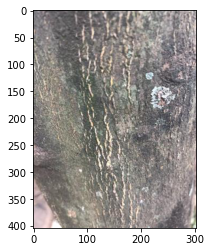

In [244]:
sample = random.choice(barkfiles) # randomly picking single image from barkfiles data.

image = load_img('C:/Users/LENOVO/Documents/Edvancer_DL_Coding/Project_TMLC/Bark/Data_All/'+sample) # Loading image by giving path of randomly selected image in above command
plt.imshow(image) # Showing or opening image.

## Defining Architecture

In [ ]:
from keras.models import 

In [245]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential() # Othermodel are Functional
# Sequential model arranges the layer in sequential order and data flows from each layer to anaother till  the output layer.

# Adding convolution layer
# Convolution layer extract various features from the input images.
#(32,(3,3))-> 32 features will be exctracted, 3x3 convo window which will iterate over image; 
# input_shape=(150,150, 3)-> input_shape of image= Width X Height =150 X 150; [3=rgb value, 1=mono colour scale]
# Convolution layer will iterate over image, and will return convolued feature matrix.
model.add(Conv2D(32, (3, 3), input_shape=(150,150, 3),activation='relu' )) 

# Adding pooling layer- 
# pool_size=(2, 2)-> 2 X 2 =size of  pooling window, which will iterate over convolued feature matrix.
# It will downside convolued feature matrix, but retain the convolued feature.
# There are different ways of retaining features, such as maximum or average. Here we used, maximum; hence MaxPooling layer.
# Now, 3x3 convolued feature matrix will be converted to now 2x2 size.
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding Dropout layer 
# It will mainly reduces the complexity of neural network(NN). It reduces the no. of nodes in NN.
# Dropping results in improving the performance of model, and reduces overfitting also.
model.add(Dropout(0.25)) # rate=0.25

# Adding another convolution layer with more no of features to be extracted (64).
# Multiple convolution layer to get better abstract representation.
# Filetrs (kernesl) that will operate on first layer of convolution extracted image, will give now better representation of image.
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # Adding again dropout layer to nullify neurons from preceeding input; rate=0.25.

# Adding flatten layer
# Flatten the images 2D tensor ( or pooled features) into 1D tensor (or continous vector).
# It is necessary to flatten because it is fed as input to fully connected layer/Dense layer.
model.add(Flatten())


# Dense layer represents the nodes in the fully connected layer.
# why it is called Dense, because it is deeply connected with its preceeding layers.
# This layer receives informtion from every neuron of precceding layers.
model.add(Dense(96, activation='relu')) # 96=32+64, adding all previous convoltion layer.

# Adding another dropout layer
# we will apply again to nullify some of the neurons/features.
model.add(Dropout(0.5)) # rate=0.5

# Adding final dense layer- which is equal to number of outputs which we are going to predict.
model.add(Dense(50, activation='softmax')) # 50; because we have fifty categories of bark textures.

# Now we will compile our mode
# loss = categorical instead of binary since it is multi class classification
# Optimizer= Adam or SGD.
# Optimizer helps in reducing the overall loss and improve accuracy.
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='Adam', )

# Adam optimizer is one of the best, due to fewer parameter requirement for tuning.

# now we are going to summarize our model.
model.summary()

# Total params= total number features the NN will extract
# Output Shape can be calculated using formulae

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 74, 74, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 36, 36, 64)       

## Adding call backs

In [246]:
# Call back is a function of Keras
# Early stopping will stop our model when it is not improving.
# learning_rate_reduction- it will stop learning rate to improve on the matrix which we are specifying,...
# ...i.e. validation loss not improving, so that it will reduce in next epoch

from keras.callbacks import EarlyStopping, ReduceLROnPlateau

ES = EarlyStopping(patience=10) # earlystop
LRR = ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=1, factor=0.5, min_lr=0.00001) # Learning Rate Reduction
CB = [earlystop, learning_rate_reduction] # callbacks

## Dividing Validation data

In [253]:
# Here both data is in same folder otherwise you can create (and extract) from two different folder for train and validation data images.
# using train test split for train and validation data, because data is in same folder.
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=0) # random_state=0 to prevent random splitting.
# Here train and validation files got split and images are different from each other.

# Validation data is created so that performance can be improved of the model.
# Model will try to validate and learn before running on actual test data.

# Lets see total 'TRAIN' files and in each category
train_df = train_df.reset_index(drop=True)
#train_df['category'].value_counts().plot.bar()

print(train_df['category'].value_counts())
print("\n Total train images: ", train_df.shape[0])
total_train = train_df.shape[0]

# Lets see total 'VALIDATE' files and in each category

validate_df = validate_df.reset_index(drop=True)
#validate_df['category'].value_counts().plot.bar()

print(validate_df['category'].value_counts())
print("\n Total validate images: ", validate_df.shape[0])
total_validate = validate_df.shape[0] 

Barringtoniaacutangula    89
Acacia                    78
Cedrus                    72
Citrusgrandis             65
Name: category, dtype: int64

 Total train images:  304
Acacia                    24
Cedrus                    21
Citrusgrandis             19
Barringtoniaacutangula    13
Name: category, dtype: int64

 Total validate images:  77


## Data Augmentation

In [ ]:
# Data augmentation is trick to increase the number of data.
# It genrates the copy of images by slightly modifying it, like changing orientation by some degree or flipping it.

In [251]:
Tr_datagen = ImageDataGenerator(rotation_range=15, rescale=1./255, shear_range=0.1, zoom_range=0.2,
                                   width_shift_range=0.1, height_shift_range=0.1,horizontal_flip=True)

# rotation_range-> It will rotate the image in right and left by the input degree.
#shear_range-> It will shear the one part of image. Base of the image sheared.
# zoom_range-> Zoom in or out of image
# width_shift_range -> will shift the image towards right or left.
# horizontal_flip -> Reversing the entire rows and columns.

V_datagen = ImageDataGenerator(rescale=1./255) # No augmentation on validation data only skewing.

TRgen = Tr_datagen.flow_from_dataframe(
    train_df,  "C:/Users/LENOVO/Documents/Edvancer_DL_Coding/Project_TMLC/Bark/Data_All/", 
    x_col='filename',  y_col='category',target_size=(150,150), batch_size=32,class_mode='categorical' )

Vgen = V_datagen.flow_from_dataframe(
    validate_df, "C:/Users/LENOVO/Documents/Edvancer_DL_Coding/Project_TMLC/Bark/Data_All/",
    x_col='filename', y_col='category', target_size=(150,150), batch_size=32,class_mode='categorical')

Found 304 validated image filenames belonging to 4 classes.
Found 77 validated image filenames belonging to 4 classes.


## Model Training

In [254]:
batch_size=50 # larger batch size will give you shorter training time.

Train = model.fit_generator(TRgen, epochs=50,validation_data=Vgen,
            validation_steps=total_validate/batch_size,steps_per_epoch=total_train/batch_size,callbacks=callbacks)

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_7500/2582393210.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  Train = model.fit_generator(TRgen, epochs=50,validation_data=Vgen,


Epoch 1/50
6/6 [==============================] - 10s 2s/step - loss: 5.8247 - accuracy: 0.2589 - val_loss: 1.4057 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 2/50
6/6 [==============================] - 8s 1s/step - loss: 1.4287 - accuracy: 0.2679 - val_loss: 1.3861 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 3/50
6/6 [==============================] - 7s 1s/step - loss: 1.3705 - accuracy: 0.3616 - val_loss: 1.3729 - val_accuracy: 0.2812 - lr: 0.0010
Epoch 4/50
6/6 [==============================] - 8s 1s/step - loss: 1.3713 - accuracy: 0.3125 - val_loss: 1.3713 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 5/50
6/6 [==============================] - 7s 1s/step - loss: 1.3313 - accuracy: 0.3990 - val_loss: 1.3392 - val_accuracy: 0.4531 - lr: 0.0010
Epoch 6/50
6/6 [==============================] - 7s 1s/step - loss: 1.2602 - accuracy: 0.4732 - val_loss: 1.2201 - val_accuracy: 0.4219 - lr: 0.0010
Epoch 7/50
6/6 [==============================] - 7s 1s/step - loss: 1.1892 - accuracy: 0.4808 - va